In [1]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from PIL import Image
import os
import math

In [2]:
class SRCNN(nn.Module):
    def __init__(self, num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=9, padding=9 // 2)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, padding=1 // 2)
        self.conv3 = nn.Conv2d(32, num_channels, kernel_size=5, padding=5 // 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.conv3(x)
        return x

Div2k MSE

In [66]:
train_losses_Div2k_mse = [8.020195573568344, 3.511964038014412, 2.4451999962329865, 2.129823863506317, 1.8414206355810165, 1.6147328689694405, 1.4215793833136559, 1.286181889474392, 1.1925887614488602, 1.0991445258259773, 1.0224268436431885, 0.948821559548378, 0.8886245489120483, 0.8467051945626736, 0.8131839707493782, 0.786385715007782, 0.768615111708641, 0.7409378476440907, 0.7267401963472366, 0.70329250395298, 0.6838566362857819, 0.6698024235665798, 0.6497146524488926, 0.6387335322797298, 0.626758024096489, 0.6143111735582352, 0.6014547944068909, 0.5904853641986847, 0.5757482312619686, 0.5686423927545547, 0.5560038834810257, 0.5485309660434723, 0.5390306562185287, 0.5331067405641079, 0.5269041582942009, 0.5187571756541729, 0.5102643668651581, 0.5057842954993248, 0.4987019710242748, 0.4943469911813736, 0.4877822510898113, 0.48246588557958603, 0.4808334745466709, 0.4720393680036068, 0.47194454818964005, 0.466118648648262, 0.4600104112178087, 0.45783932507038116, 0.4577826503664255, 0.45037792809307575, 0.4533032178878784, 0.4468351751565933, 0.4472678229212761, 0.43870457261800766, 0.44005272537469864, 0.437895929440856, 0.43463060818612576, 0.426976939663291, 0.4293222613632679, 0.42361385747790337, 0.422787856310606, 0.42091584019362926, 0.4149644300341606, 0.4132733475416899, 0.4130255877971649, 0.411174688488245, 0.41069201193749905, 0.41166662611067295, 0.41069033928215504, 0.4112135451287031, 0.4057639166712761, 0.401246827095747, 0.39651128090918064, 0.4013530872762203, 0.3961981572210789, 0.3933334480971098, 0.39531796611845493, 0.3984294142574072, 0.39654543064534664, 0.3893329668790102, 0.3919968716800213, 0.38836796022951603, 0.38691106252372265, 0.38654933124780655, 0.3850002810359001, 0.3858216553926468, 0.38314222916960716, 0.3807607889175415, 0.3833439163863659, 0.38972243294119835, 0.3879545293748379, 0.3835317399352789, 0.38125170953571796, 0.3787051234394312, 0.3769739717245102, 0.37425320595502853, 0.3753252401947975, 0.37224598973989487, 0.375807324424386, 0.37276420183479786]
val_losses_Div2k_mse = [0.6885036826133728, 0.4249882698059082, 0.364315390586853, 0.3189266473054886, 0.2776733636856079, 0.24089254438877106, 0.21747089177370071, 0.20414810627698898, 0.18187447637319565, 0.17059525102376938, 0.16360829770565033, 0.143570926040411, 0.14223750680685043, 0.1369834914803505, 0.13542785868048668, 0.12212761119008064, 0.12190758064389229, 0.11641218513250351, 0.11568784341216087, 0.11665896698832512, 0.10907190665602684, 0.11134105548262596, 0.10602666810154915, 0.10258935764431953, 0.10335572436451912, 0.09967158362269402, 0.09851262718439102, 0.09811225160956383, 0.09678246825933456, 0.09053612500429153, 0.09169759601354599, 0.08800534531474113, 0.08888435736298561, 0.08749550580978394, 0.0889565572142601, 0.08399736508727074, 0.08464468270540237, 0.08100294694304466, 0.08118604496121407, 0.08178423717617989, 0.0784108005464077, 0.07706867530941963, 0.07551052048802376, 0.07469046860933304, 0.07633719220757484, 0.07398296147584915, 0.07494970038533211, 0.0744543969631195, 0.07244817540049553, 0.07578472048044205, 0.0702030174434185, 0.07257154956459999, 0.07316508144140244, 0.07293813675642014, 0.06880389153957367, 0.07366468012332916, 0.06864491477608681, 0.07249025627970695, 0.0681886188685894, 0.07009506225585938, 0.07009673118591309, 0.0682600736618042, 0.06856507807970047, 0.06583123467862606, 0.06906406208872795, 0.06857243925333023, 0.06810156628489494, 0.06868042051792145, 0.06796912476420403, 0.06442038342356682, 0.06667110696434975, 0.06374590657651424, 0.067106943577528, 0.06482687219977379, 0.06473993882536888, 0.062360674142837524, 0.06311061792075634, 0.06388156116008759, 0.06386299431324005, 0.0652940385043621, 0.06275984458625317, 0.0626677181571722, 0.06279428489506245, 0.062044018879532814, 0.062097400426864624, 0.061912499368190765, 0.06280264258384705, 0.06487976387143135, 0.06574660912156105, 0.06414288468658924, 0.06404575146734715, 0.06188276968896389, 0.06215871125459671, 0.06233666650950909, 0.0615488700568676, 0.06288409605622292, 0.05989091470837593, 0.0596977137029171, 0.06144215539097786, 0.05962565168738365]
train_psnr_Div2k_mse = [11.429798520552163, 14.730388692586033, 16.330176112108937, 16.953006520030414, 17.60637939282947, 18.20879614374249, 18.786804758252607, 19.232590714241315, 19.57146250149206, 19.951679439875907, 20.261460661498297, 20.603061031740836, 20.89965357129587, 21.11838701058382, 21.303144002358927, 21.451446580806056, 21.56362904852756, 21.71711658590503, 21.81350673080702, 21.953300128182114, 22.07922860262241, 22.169883111105413, 22.319109697034463, 22.394686790416895, 22.473707847979934, 22.57393164204875, 22.657111684841084, 22.744093767932558, 22.86222921983697, 22.912700058871046, 23.030540021158345, 23.08083732788251, 23.15535950525823, 23.20976532099197, 23.2633189751518, 23.326877467117782, 23.403807807488075, 23.441518920337742, 23.504637238650556, 23.540837529089025, 23.60287432925295, 23.653912446294086, 23.671941387446562, 23.765558170958947, 23.76324351006871, 23.812144092618464, 23.883709012324367, 23.886887775236357, 23.896605997377602, 23.968928818161448, 23.936464225106814, 24.00184008927836, 23.99929400533626, 24.10131687752818, 24.068666078875175, 24.09462197936883, 24.12691976391785, 24.211458836969914, 24.191575307400605, 24.240121479461024, 24.25204426744248, 24.271872226411503, 24.337928177736032, 24.366356828157087, 24.36165731513971, 24.383574685167886, 24.38422271119525, 24.37771089101631, 24.385566492673156, 24.38052800682614, 24.450360630181567, 24.50335852472541, 24.567640586575493, 24.48947867852397, 24.553336434071962, 24.585521884195128, 24.568648749624405, 24.520177523100223, 24.541802605037528, 24.63125214484655, 24.603251005119613, 24.642063086833524, 24.6551396807382, 24.652046134216466, 24.686997162056787, 24.66836695182253, 24.703930167761683, 24.736392095145572, 24.69695429440441, 24.62346309563731, 24.637794428109125, 24.69271628798861, 24.716163936224245, 24.752948531858937, 24.77459608690367, 24.820570722116756, 24.799435674941996, 24.83264616122254, 24.798281785840082, 24.822925819186324]
val_psnr_Div2k_mse = [16.725021707869093, 19.415704831720458, 20.261919611495095, 21.00379073512103, 21.771489958468624, 22.55950994396051, 23.127526030939798, 23.498868964926277, 24.129356345739744, 24.477720962441257, 24.730813338101576, 25.492439034438327, 25.489562205285978, 25.703124967197063, 25.808846878089, 26.380636273201485, 26.34691801644635, 26.624307592564083, 26.6374181821957, 26.614882914775716, 26.973735280880156, 26.872675966167726, 27.120950999071674, 27.30935054496511, 27.271926588018868, 27.46454216362372, 27.531991020449823, 27.571990131796454, 27.663060489245233, 28.01864243723698, 27.930134253385173, 28.16543449030681, 28.10732110027067, 28.194184024248795, 28.15898657653796, 28.415754605941885, 28.384371467577886, 28.623091958076675, 28.604904629699266, 28.577747713054908, 28.803164200863264, 28.909456749876973, 29.042012371507397, 29.11083673824377, 28.947453423286444, 29.142725957310244, 29.049558841075267, 29.08624365537461, 29.255574390720366, 28.990575594002063, 29.47935223817033, 29.22931302455038, 29.191493440717153, 29.206258479957388, 29.562647667464358, 29.19671254767868, 29.55695831016465, 29.281437756873657, 29.58306475438117, 29.430898069167824, 29.430700047639736, 29.569243122615212, 29.546202749095656, 29.789636757711804, 29.531250896809038, 29.568222287356082, 29.60223945290024, 29.536761551020945, 29.593800629779864, 29.94001604059663, 29.709227091389348, 29.97155622856395, 29.698094594256485, 29.856071890547028, 29.864409768737634, 30.097410301940453, 30.02773937932297, 29.93801060036471, 29.93955560886221, 29.84414236576729, 30.037255398353462, 30.044690701576634, 30.03298531010528, 30.10688057770092, 30.096801735412733, 30.11415712687923, 30.03345287582173, 29.87423457789461, 29.81218712269965, 29.916964936755804, 29.934486672323857, 30.11676145579091, 30.091356247051234, 30.077079400598322, 30.14794388547771, 30.067094030261035, 30.302392916316368, 30.320908606108752, 30.16543112179078, 30.324824777907132]

In [89]:
max(val_psnr_Div2k_mse)

30.324824777907132

Div2k MAE



In [67]:
train_losses_Div2k_mae = [8.296406418085098, 4.735920667648315, 3.885017365217209, 3.4629264771938324, 3.147889420390129, 2.880540370941162, 2.6853432953357697, 2.5730958729982376, 2.4647040367126465, 2.3808355182409286, 2.312049075961113, 2.264036104083061, 2.201013505458832, 2.176869496703148, 2.129924476146698, 2.108426570892334, 2.1243229806423187, 2.0569182634353638, 2.072178542613983, 2.086570531129837, 2.015972062945366, 1.980553537607193, 1.985804095864296, 1.9571627080440521, 1.9457317292690277, 1.9155918806791306, 1.9072099030017853, 1.9029822945594788, 1.9005972146987915, 1.8698266297578812, 1.8391245156526566, 1.8559989929199219, 1.8155576884746552, 1.8272753655910492, 1.8235166817903519, 1.80362668633461, 1.782985344529152, 1.7827304750680923, 1.7733440399169922, 1.7620213031768799, 1.724225677549839, 1.7480701208114624, 1.7393990010023117, 1.7070179805159569, 1.6968572661280632, 1.7003761008381844, 1.6856061518192291, 1.6817486360669136, 1.7027650028467178, 1.7239733040332794, 1.699855886399746, 1.7328249365091324, 1.6794681549072266, 1.6277216747403145, 1.6275379359722137, 1.6317619308829308, 1.6262309178709984, 1.6267622336745262, 1.6250134781002998, 1.6070696339011192, 1.5906887650489807, 1.6012958958745003, 1.6436517015099525, 1.6296255737543106, 1.6284034326672554, 1.599459394812584, 1.6229702532291412, 1.6113995239138603, 1.5759941413998604, 1.5592311173677444, 1.5534606650471687, 1.557707279920578, 1.545789197087288, 1.5411825999617577, 1.5553150996565819, 1.543612390756607, 1.546561375260353, 1.5430288836359978, 1.5444961041212082, 1.557456262409687, 1.548048883676529, 1.549724467098713, 1.5439249649643898, 1.5421449169516563, 1.5505077168345451, 1.503908433020115, 1.503114826977253, 1.5355461984872818, 1.5255033448338509, 1.5314836949110031, 1.5198631808161736, 1.5201039537787437, 1.4985955506563187, 1.4951441064476967, 1.4973105937242508, 1.5133017748594284, 1.5037040933966637, 1.512785904109478, 1.504493273794651, 1.505171224474907]
val_losses_Div2k_mae = [0.8222888708114624, 0.6569882929325104, 0.5781228840351105, 0.5235948860645294, 0.4810017943382263, 0.4454514980316162, 0.41824871301651, 0.3972433805465698, 0.38845840096473694, 0.3764594942331314, 0.3723743110895157, 0.3607371300458908, 0.3505728393793106, 0.3466215580701828, 0.33839745819568634, 0.33221784234046936, 0.33058567345142365, 0.3388342410326004, 0.3305511176586151, 0.32355086505413055, 0.32907097041606903, 0.3209678530693054, 0.31108011305332184, 0.31791581213474274, 0.3060113489627838, 0.3035314530134201, 0.3029306083917618, 0.30965936183929443, 0.3011106997728348, 0.30035075545310974, 0.2952287495136261, 0.2951681911945343, 0.2967579811811447, 0.29277488589286804, 0.2871064692735672, 0.28898584842681885, 0.28551414608955383, 0.28598079085350037, 0.2774420827627182, 0.2737463563680649, 0.28071871399879456, 0.28210166096687317, 0.26854997873306274, 0.2760075628757477, 0.2695181667804718, 0.27385514974594116, 0.27060292661190033, 0.270431250333786, 0.2773076742887497, 0.2680317163467407, 0.2801685482263565, 0.2709227651357651, 0.2672267556190491, 0.2594340592622757, 0.2544628605246544, 0.26107533276081085, 0.266358345746994, 0.2583385482430458, 0.26607226580381393, 0.25777319073677063, 0.25991376489400864, 0.27005477249622345, 0.26091091334819794, 0.2607356160879135, 0.2571014165878296, 0.26398545503616333, 0.26155558228492737, 0.2533833235502243, 0.2526087313890457, 0.24949030578136444, 0.25237366557121277, 0.24611429125070572, 0.2489999532699585, 0.25400198996067047, 0.2510630413889885, 0.2515208274126053, 0.2495792880654335, 0.25342152267694473, 0.2495066002011299, 0.2581022381782532, 0.24501964449882507, 0.256450392305851, 0.24765340238809586, 0.247979573905468, 0.2457202821969986, 0.2358909174799919, 0.2413419485092163, 0.23968326300382614, 0.24236686527729034, 0.24030006676912308, 0.24437261372804642, 0.24368593096733093, 0.24313730001449585, 0.24392729997634888, 0.24352115392684937, 0.24275802075862885, 0.24574589729309082, 0.24296710640192032, 0.24008890241384506, 0.24720487743616104]
train_psnr_Div2k_mae = [11.350446305567615, 15.237637133063851, 16.55720258683955, 17.24428805972643, 17.898644888316348, 18.52789252578764, 19.049355705520078, 19.423632472727608, 19.705593394325533, 19.980499569969144, 20.25313477697807, 20.45531307968246, 20.708091184188564, 20.83724943562995, 21.028504062092416, 21.160799641189374, 21.214819941653815, 21.376343792451934, 21.42793572410008, 21.43875041540043, 21.62181433276479, 21.711073672496077, 21.751152179117327, 21.821763783984963, 21.87783352805218, 21.99373090932295, 22.04226120477037, 22.120639361941688, 22.13427424402716, 22.22627230209257, 22.317989838104687, 22.35106634520404, 22.45362004403244, 22.458762371407243, 22.491289371117126, 22.570307257611283, 22.630593109391597, 22.679788242521457, 22.718422429341786, 22.766291302782452, 22.88232117027482, 22.86160330935653, 22.896819517984486, 22.992837646714047, 23.05819896855759, 23.068429108165354, 23.119990325761215, 23.159837094311726, 23.138100539791203, 23.089940363751165, 23.194687324954927, 23.148793149307508, 23.246301766617833, 23.347077918300148, 23.401254641323984, 23.417285583175634, 23.43223746370155, 23.42932582345787, 23.474782947487228, 23.514056457408255, 23.55826952986051, 23.58783116306322, 23.531160695379864, 23.540335363361514, 23.56275224849971, 23.637947001068213, 23.593122389024916, 23.599109553827184, 23.68276336358413, 23.746122192232903, 23.76678987937199, 23.76610512626223, 23.8072567876836, 23.846843693560388, 23.814499350296618, 23.86053814305601, 23.85968648630152, 23.854505289527307, 23.871672775563816, 23.883337376183004, 23.9131246078303, 23.882899024298283, 23.931311409386765, 23.956027016885834, 23.918414957069157, 24.027550490501042, 24.01855480248937, 24.006137564582083, 24.01934223372531, 24.04877854986052, 24.031360374617023, 24.03456090950054, 24.08326733197394, 24.089119998108586, 24.1063174607917, 24.097546953582846, 24.127418501705705, 24.109659073980374, 24.11999217712951, 24.13614966108482]
val_psnr_Div2k_mae = [17.75590676605905, 19.583237588512787, 20.566173687417567, 21.386871363282516, 22.12926761154945, 22.803521786521845, 23.426371590281928, 23.94041745655162, 24.070569826864926, 24.428295741425053, 24.684052106447954, 24.91595372298799, 25.26656194973342, 25.29910707566388, 25.600730965078654, 25.7864724295831, 25.990746179756414, 25.83958236997376, 25.99245438900284, 26.23341012567406, 26.091885425873123, 26.43580849152844, 26.569855251710443, 26.362835041532097, 26.699183969157712, 26.81296210272054, 26.911789189682104, 26.799940434886512, 26.953197377265415, 26.946845888172604, 27.136438960818285, 27.219144535244745, 27.076163420599052, 27.24850207122837, 27.500808330027912, 27.290754425923502, 27.567378120602697, 27.581656658626517, 27.779021195720723, 27.85697651733983, 27.836058409769162, 27.749013738970106, 27.998214854174684, 27.768776535992775, 28.154942537120434, 27.93836210553695, 28.072418326406197, 28.102429256696453, 27.98232180169181, 28.188740915393865, 28.08732148839006, 28.26011333507405, 28.207446304999067, 28.519415724267887, 28.681115132215623, 28.457933888695223, 28.336819844350835, 28.571788857630317, 28.381333863792616, 28.517272319119574, 28.48564417877549, 28.39608972746657, 28.6386421129396, 28.58512282633217, 28.727860456447377, 28.536954229984723, 28.601681453355333, 28.788729703937324, 28.825469627624074, 28.80896646462965, 28.809173319136622, 28.97856055522019, 28.987000685429393, 28.763556473629418, 28.924628688760375, 28.821567374611423, 28.930150278233214, 28.853463670465466, 28.959332597625085, 28.816906461115373, 29.20799114880154, 28.96594156765088, 28.98706151261373, 29.18211691835165, 29.064552375657946, 29.53773646314687, 29.208062330343836, 29.21531723829206, 29.61082204017434, 29.265518907175274, 29.201200588870524, 29.133206551919884, 29.15754376101281, 29.164336631653427, 29.253821887673876, 29.30436926688469, 29.211524636721535, 29.28385186153011, 29.319731790894238, 29.198139884592965]

In [90]:
max(val_psnr_Div2k_mae)

29.61082204017434

Div2k MSLE

In [69]:
train_losses_Div2k_msle = [0.6486994307488203, 0.18271168507635593, 0.11298646917566657, 0.0884626037441194, 0.07401718385517597, 0.06441678712144494, 0.0537781803868711, 0.04442777344956994, 0.03845785488374531, 0.035108678275719285, 0.03287408873438835, 0.031078345142304897, 0.030034996336326003, 0.029141189297661185, 0.0280440803617239, 0.0274511146126315, 0.026375500136055052, 0.025711556198075414, 0.024859080440364778, 0.024261569953523576, 0.023590115713886917, 0.022851407760754228, 0.022489992901682854, 0.021958944271318614, 0.021450829226523638, 0.0211753414478153, 0.020651147118769586, 0.02040820347610861, 0.020040197297930717, 0.01987171929795295, 0.019640469690784812, 0.0194317459827289, 0.019169053994119167, 0.018925561453215778, 0.018808652879670262, 0.01860588148701936, 0.018594429595395923, 0.018362647271715105, 0.01795985852368176, 0.017962703248485923, 0.017614804673939943, 0.01741588907316327, 0.017414950183592737, 0.017120164120569825, 0.01702672941610217, 0.0167892660247162, 0.01665709784720093, 0.01653126091696322, 0.016457611927762628, 0.01626037561800331, 0.016178410267457366, 0.01603449776303023, 0.015947122708894312, 0.01584984955843538, 0.01566728507168591, 0.015988503699190915, 0.015400494216009974, 0.015370686422102153, 0.015339657082222402, 0.015146058518439531, 0.014942363137379289, 0.014970210380852222, 0.014736130833625793, 0.014722549996804446, 0.01462140993680805, 0.014706755755469203, 0.01444291794905439, 0.014172519324347377, 0.014180952915921807, 0.014082976384088397, 0.014190818241331726, 0.014337983739096671, 0.013891624170355499, 0.013791342673357576, 0.013787377218250185, 0.013587598921731114, 0.013446455937810242, 0.013416085566859692, 0.01338041789131239, 0.014059143839403987, 0.013470765145029873, 0.013178875553421676, 0.013252729782834649, 0.013204410090111196, 0.013100158947054297, 0.012834063323680311, 0.012859373935498297, 0.012793139496352524, 0.012793278496246785, 0.012673091376200318, 0.012643582944292575, 0.012583212577737868, 0.012671799457166344, 0.012490607157815248, 0.012633228208869696, 0.012924468610435724, 0.01373089588014409, 0.013337019190657884, 0.012567514029797167, 0.012322578229941428]
val_losses_Div2k_msle = [0.04365491308271885, 0.019978092052042484, 0.014668847899883986, 0.012091800104826689, 0.011181712616235018, 0.009508057963103056, 0.007564248749986291, 0.006634210469201207, 0.005894955014809966, 0.005408066092059016, 0.005147005431354046, 0.005072050029411912, 0.00471875537186861, 0.0047667615581303835, 0.004522243514657021, 0.004341550869867206, 0.0043616462498903275, 0.004159089410677552, 0.003997031366452575, 0.003999063395895064, 0.003855516784824431, 0.003734337165951729, 0.0037005257327109575, 0.0036322848172858357, 0.003641019808128476, 0.0034201842499896884, 0.0033275227760896087, 0.0033214075956493616, 0.003372571081854403, 0.003210067516192794, 0.0032787935342639685, 0.003284222213551402, 0.00311431591399014, 0.0032878676429390907, 0.003204460605047643, 0.0030837112572044134, 0.003074363456107676, 0.002988724852912128, 0.002863766043446958, 0.003060248796828091, 0.0030019284458830953, 0.0029891986632719636, 0.0029550069011747837, 0.002843207446858287, 0.002753274398855865, 0.0028990376740694046, 0.002739548683166504, 0.0027032491052523255, 0.002728687017224729, 0.0027061646105721593, 0.0027372308541089296, 0.0026796594029292464, 0.0027154266135767102, 0.002665161737240851, 0.0025932645658031106, 0.0025741743156686425, 0.0024435758823528886, 0.0025614972691982985, 0.00255921867210418, 0.0024680946953594685, 0.00239190855063498, 0.002529841964133084, 0.0024049520725384355, 0.0025865164352580905, 0.002493207692168653, 0.0023743812926113605, 0.002367869485169649, 0.0023656623670831323, 0.0022578260395675898, 0.0023297941079363227, 0.0024276229087263346, 0.002392748137935996, 0.0023479488445445895, 0.002233026607427746, 0.002310898038558662, 0.002325938898138702, 0.0022523547522723675, 0.002226884593255818, 0.002254102611914277, 0.002227890188805759, 0.0021335913916118443, 0.002112540474627167, 0.0021409944747574627, 0.0021898805862292647, 0.0021511163795366883, 0.0021363227861002088, 0.0021241081412881613, 0.0021120643941685557, 0.0020829705172218382, 0.0022418771986849606, 0.002137869712896645, 0.0021394898649305105, 0.002150760032236576, 0.0020351195707917213, 0.002053915522992611, 0.0022716927342116833, 0.0025492494460195303, 0.002120142278727144, 0.0020281492616049945, 0.0021340579842217267]
train_psnr_Div2k_msle = [12.188151106211038, 16.01912358995242, 18.17065970441644, 19.429799973827667, 20.20380770619356, 20.848664885910786, 21.624236946314987, 22.48384177114785, 23.109091326526418, 23.48129210904765, 23.782761710309686, 24.021584468214026, 24.177151157714732, 24.32021516276958, 24.50095273930326, 24.590085604664136, 24.76830713504215, 24.889211561012477, 25.04562553934728, 25.153882900533876, 25.278635919863977, 25.424303086654554, 25.502589572417293, 25.614814778450963, 25.712026126357337, 25.7720339845808, 25.89177160701364, 25.94634385541696, 26.02361340551892, 26.073717465409675, 26.124401517911355, 26.16434577165881, 26.231124763831062, 26.29483731022521, 26.318837952407033, 26.377012474816542, 26.360301794832523, 26.42540854930361, 26.533244859917126, 26.53933612304409, 26.62948656238686, 26.694759031235506, 26.685267488340447, 26.777129733973137, 26.78887719553862, 26.865052841731504, 26.900773918350016, 26.944039309803383, 26.963033107000733, 27.01120150230625, 27.035571427143413, 27.083402763538032, 27.11302136185634, 27.143081418960637, 27.197117730880404, 27.083635976260865, 27.280043171891357, 27.290565144740413, 27.283726717117908, 27.36285461300988, 27.41666045810918, 27.40081275699768, 27.49524240627145, 27.495044497027845, 27.518303640780623, 27.485831232417333, 27.574302153254965, 27.68968463201168, 27.66639498956809, 27.71146640089564, 27.66370812067826, 27.60331603973717, 27.763892125568724, 27.802770951018964, 27.81741950040993, 27.878572103842433, 27.924601139041293, 27.945426905658643, 27.944970229501283, 27.68001611419023, 27.909017091306303, 28.01965850640235, 28.0024071814291, 28.013687023944787, 28.054625883050985, 28.16024329808305, 28.146273917438993, 28.161875759712167, 28.165353600534498, 28.205352496811802, 28.21856770236284, 28.23817459813983, 28.202600410504044, 28.276066767427434, 28.21484494868415, 28.078115695361774, 27.736809789800233, 27.916940844310876, 28.23573411328248, 28.323675128734354]
val_psnr_Div2k_msle = [16.55451111340725, 21.27011252425496, 23.62977391352313, 24.48301728064681, 25.05706120164379, 25.911197765513943, 27.11867072996597, 27.85023487047131, 28.417592208869966, 28.937010748887918, 29.194245453806026, 29.356049046587003, 29.721904175851407, 29.695048525159535, 29.983049448400433, 30.202263653161385, 30.199895118967362, 30.413178831211297, 30.62681314870586, 30.64069085746376, 30.90044239110857, 31.041217626193248, 31.11490907757352, 31.225233633598478, 31.208746538111473, 31.556230950907672, 31.683887508931367, 31.715510609162838, 31.65778983169127, 31.90141141963922, 31.79772781492063, 31.8367609869429, 32.070766483384816, 31.87608664708884, 31.963952976546032, 32.114038064590616, 32.15797555403887, 32.38273534866351, 32.59443033609487, 32.24980001155437, 32.334647151150875, 32.389942222664814, 32.33461237753658, 32.60315348827365, 32.81633390362997, 32.5440057280485, 32.81896570345677, 32.914815905983936, 32.872531233338265, 32.91714834431092, 32.85918150882241, 33.008286475344164, 32.94237323557355, 33.00996093637524, 33.11073634772701, 33.18434544921147, 33.555421046179724, 33.151168294306046, 33.23999828934282, 33.44833710762827, 33.656735225595206, 33.34091013941586, 33.57995439005016, 33.254362169868415, 33.3876371074858, 33.70840858589951, 33.70664193476338, 33.70289591337145, 34.04191547681693, 33.76987439281373, 33.63921982418881, 33.64404467225014, 33.81119351146067, 34.121258238409126, 33.81676817411144, 33.82126691075668, 34.00952753792182, 34.06812526662078, 34.005893605683085, 34.052047702707505, 34.362680097237195, 34.43858002579633, 34.26502742906903, 34.140057671083305, 34.20658872194322, 34.27572500314027, 34.288246235937976, 34.31889791227295, 34.47399093915533, 34.14004051572136, 34.30687302326449, 34.30043044443865, 34.26318290366404, 34.56759496962186, 34.523512669454924, 33.85476784315521, 32.98593964868217, 34.33626299079312, 34.57597630839313, 34.370061279753415]

In [91]:
max(val_psnr_Div2k_msle)

34.57597630839313

Div2k Log Cosh

In [68]:
train_losses_Div2k_lc = [33609732.75, 15234513.4375, 10365235.21875, 8533539.125, 7458583.71875, 6640088.921875, 5983221.5625, 5472614.515625, 5075037.21875, 4736618.78125, 4423083.625, 4152992.75, 3915724.8125, 3714843.71875, 3554734.2734375, 3426345.421875, 3319972.015625, 3227017.75, 3145941.140625, 3069564.328125, 2993964.21875, 2927741.765625, 2859673.609375, 2799980.3125, 2741144.34375, 2686535.0625, 2640371.046875, 2600046.1953125, 2547512.0859375, 2487629.0625, 2446242.90625, 2406524.34375, 2373800.75, 2466278.921875, 2478391.5625, 2367888.203125, 2288454.96875, 2248332.578125, 2228482.21875, 2209665.21875, 2189701.421875, 2173248.484375, 2156341.4140625, 2141323.875, 2127061.34375, 2113687.4453125, 2100870.8984375, 2089244.0625, 2076959.46875, 2064014.625, 2047010.078125, 2032847.671875, 2020485.7109375, 2008776.58203125, 1999655.65625, 1991291.28125, 1981089.21875, 1982676.9609375, 1997280.03125, 1998450.2890625, 2004324.078125, 1965905.0234375, 1954317.109375, 1929616.15625, 1912531.5625, 1907860.5625, 1900263.0078125, 1884529.7578125, 1874750.1484375, 1879297.0703125, 1869829.796875, 1853877.0390625, 1845224.984375, 1837423.3046875, 1831117.7421875, 1824792.2109375, 1817653.8125, 1813605.6796875, 1807502.296875, 1803109.3984375, 1793871.3828125, 1788458.7265625, 1794705.4765625, 1821330.578125, 1867090.578125, 1800056.9296875, 1776005.65625, 1768869.8515625, 1765751.2578125, 1750311.125, 1742168.671875, 1737246.5078125, 1733389.6953125, 1728871.609375, 1723930.85546875, 1719846.0, 1714981.4140625, 1708960.09375, 1704157.65234375, 1699823.0859375]
val_losses_Div2k_lc = [2291462.1875, 1585445.125, 1198158.21875, 1044785.1875, 924478.90625, 828562.75, 751461.8125, 693842.328125, 646318.125, 603607.03125, 565850.1875, 532667.40625, 504643.796875, 481697.765625, 463305.28125, 448057.265625, 435380.875, 424575.640625, 414422.140625, 404133.5, 395316.96875, 386376.078125, 378005.5625, 372422.078125, 362964.171875, 356613.5546875, 351917.5234375, 346656.375, 336044.3203125, 329799.140625, 325095.046875, 321091.921875, 317149.734375, 328345.3125, 335051.1875, 311203.78125, 302297.8046875, 300098.515625, 297042.359375, 293915.2578125, 291883.3515625, 289096.953125, 287337.4609375, 285237.2109375, 283359.1484375, 281574.3125, 280326.171875, 278541.953125, 276514.8125, 274110.578125, 272283.09375, 270492.015625, 269069.5625, 267556.5625, 266261.828125, 264965.46875, 264274.0625, 267453.796875, 267966.03125, 269916.421875, 266520.265625, 263583.640625, 261650.4140625, 255087.6875, 255315.84375, 254694.5234375, 252152.421875, 250665.3359375, 250239.953125, 250588.78125, 248417.125, 246505.375, 245544.1171875, 244617.734375, 243754.046875, 242818.171875, 241904.703125, 241355.25, 240718.3046875, 239529.0703125, 238725.4921875, 238198.40625, 239395.5546875, 251470.1875, 247849.0546875, 238534.765625, 235028.1875, 236721.921875, 233830.5859375, 232775.40625, 231876.6875, 231093.546875, 230256.15625, 229379.265625, 228945.125, 228161.609375, 227464.171875, 226629.921875, 226271.7890625, 225726.734375]
train_psnr_Div2k_lc = [10.996488883503039, 14.386695739988607, 16.191084086291845, 17.060303019710442, 17.69224729598764, 18.243469639439017, 18.73705015937644, 19.15153712757985, 19.522643127068694, 19.898330818290606, 20.218645639699158, 20.522936604208823, 20.77010151858898, 21.043702956482953, 21.283955347294008, 21.43158503486397, 21.5788196512729, 21.717925839254125, 21.820421710148437, 21.91915015467691, 22.078441533530153, 22.169456868029236, 22.281028164229383, 22.408904314825545, 22.494867452434942, 22.57386022360725, 22.687387313925232, 22.731489312592206, 22.837961779612183, 22.93070863598904, 23.031147296587392, 23.11372800645199, 23.192834974173024, 22.977599911978444, 23.002824535390925, 23.166988672921125, 23.33901509110069, 23.442257824770913, 23.463526508228387, 23.486147505027276, 23.526124480409162, 23.621736465466153, 23.611851977165546, 23.66114167391067, 23.666295195810044, 23.710080620044906, 23.737365052548224, 23.767407131875693, 23.76865216343603, 23.827072953733254, 23.87296073509273, 23.872562165622426, 23.93455179693168, 23.97693589601434, 23.97556668470455, 24.03183057175301, 23.995646280974555, 24.017054374632394, 23.98500038982107, 24.012053676707716, 23.973443826459032, 24.02390485743304, 24.07748863937104, 24.1449575858644, 24.139730998544355, 24.218434154357563, 24.223632363108127, 24.235239387513744, 24.28290396804541, 24.259540821797117, 24.308063845823416, 24.348613737109158, 24.34873061302675, 24.359270353631633, 24.372085087743113, 24.388066877543977, 24.443067047265615, 24.40878403481918, 24.418254055295083, 24.44611326062795, 24.44910604631933, 24.465174930420716, 24.459608124541145, 24.415865885862548, 24.276441493881045, 24.468256739048556, 24.51677296510599, 24.54828574345413, 24.56479868326802, 24.586048413122626, 24.583185989247784, 24.624893817560697, 24.608623643649697, 24.630801831022175, 24.67275948562301, 24.64928337079328, 24.66252833732917, 24.693678459356317, 24.720950183282206, 24.73887668719775]
val_psnr_Div2k_lc = [16.53703359673666, 18.596207646531262, 20.257437288235504, 21.31291969063591, 22.012948160734933, 22.494398654982135, 23.16933139307801, 23.597821875391283, 23.76489578964533, 24.28926634764434, 24.727453406503788, 25.189476347327645, 25.522898099390705, 25.686439810626396, 25.84501175176458, 26.15622328916719, 26.141388376132, 26.679646032398736, 26.724156221525018, 26.636087002260364, 26.81950189330373, 26.97607333092692, 26.94829715223542, 27.436332647929074, 27.254727561177095, 27.41922434655572, 27.516790352083298, 27.453351117582343, 27.693829418436813, 27.794711381004813, 27.983224364801394, 28.27026196818355, 28.206102351191984, 27.826884527410424, 27.832027904504073, 28.198922360660426, 28.579508816912256, 28.750134683333126, 28.46192027892945, 28.451812676548023, 28.69545040243811, 28.61781124191766, 28.70175490961443, 28.781628363793423, 28.905820884206133, 28.805247290476995, 28.917207042326755, 28.913583238314832, 28.92886506179955, 28.79942751986483, 28.913886863262906, 29.15763563581356, 29.01520356442503, 29.048510798246205, 29.1893273459971, 29.080696542212408, 29.01457447434832, 29.109561590433067, 29.193618788784352, 29.02845257677092, 28.95783291755791, 29.362271576729118, 29.257149044456423, 29.21899173128307, 29.29170297687252, 29.54270549736014, 29.343152686316216, 29.512931462812567, 29.695863764523157, 29.330826114904557, 29.439593624305715, 29.87579958915644, 29.494617538975614, 29.60930653319167, 29.608212238274685, 29.56978411155318, 29.645935518391163, 29.733253455106002, 29.62907444109169, 29.61576911444151, 29.905472519868116, 29.819402500400084, 29.773950007055518, 29.35310797921321, 29.451244747827005, 29.694613705396865, 30.048962528365067, 29.827432587524182, 29.98108325956671, 30.052610765505793, 29.86508018139174, 30.020087487159188, 29.97913334766437, 29.836611956571204, 30.24663488482347, 29.970719387347554, 29.866183409497175, 29.935856286484263, 30.05228893310269, 30.073488669208047]

In [92]:
max(val_psnr_Div2k_lc)

30.24663488482347

Div2k Comparison

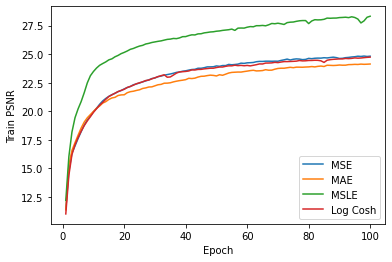

In [70]:
fig,ax = plt.subplots(1)
l,=ax.plot(range(1,101), train_psnr_Div2k_mse)
l.set_label('MSE')
l,=ax.plot(range(1,101), train_psnr_Div2k_mae)
l.set_label('MAE')
l,=ax.plot(range(1,101), train_psnr_Div2k_msle)
l.set_label('MSLE')
l,=ax.plot(range(1,101), train_psnr_Div2k_lc)
l.set_label('Log Cosh')
ax.legend()
plt.ylabel("Train PSNR")
plt.xlabel("Epoch")
plt.show()

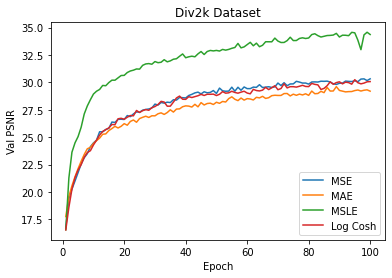

In [216]:
fig,ax = plt.subplots(1)
l,=ax.plot(range(1,101), val_psnr_Div2k_mse)
l.set_label('MSE')
l,=ax.plot(range(1,101), val_psnr_Div2k_mae)
l.set_label('MAE')
l,=ax.plot(range(1,101), val_psnr_Div2k_msle)
l.set_label('MSLE')
l,=ax.plot(range(1,101), val_psnr_Div2k_lc)
l.set_label('Log Cosh')
ax.legend()
plt.ylabel("Val PSNR")
plt.xlabel("Epoch")
plt.title(label="Div2k Dataset")
plt.show()

COCO MSE

In [72]:
train_losses_COCO_mse = [0.0422534328129006, 0.009151230718393657, 0.007250718802089095, 0.006438633847916657, 0.006100951477002242, 0.005853384720009963, 0.005553470131716038, 0.005456532637962171, 0.0052546899515667385, 0.005054687081170017, 0.005035472707605374, 0.004875123807860441, 0.004819808172335459, 0.004754584393836604, 0.0046842511020598965, 0.005339947291577745, 0.004524916566529144, 0.004550678046836529, 0.004895003582207788, 0.004576271023479468, 0.004466288174608576, 0.0066181041346095775, 0.00524282302329134, 0.004450559582747198, 0.004596207549010972, 0.004453691653678304, 0.004368988173011483, 0.004397032218466586, 0.004592177814103064, 0.004356684177227269, 0.004397036681120713, 0.005616300560960847, 0.004561015718071766, 0.004303273819487717, 0.004271196385464036, 0.004550105539606923, 0.004281027947754246, 0.0042373534734400945, 0.004576321178142697, 0.004186016893852892, 0.007679373630440907, 0.004729747055920506, 0.004452214472660832, 0.004265705855320091, 0.004210538256071638, 0.004210265808106055, 0.004238673598343657, 0.0047696444676524445, 0.004440488198230271, 0.004195233534280516, 0.004381201425597039, 0.004151368074124587, 0.005040627354877365, 0.0041518664796785605, 0.004126713273417958, 0.004138719560708993, 0.004335722177744439, 0.004100411552555707, 0.004206613998082454, 0.004153808587184256, 0.004907013396387871, 0.004098362315703529, 0.004058377826890929, 0.004064520708767764, 0.004158772771089412, 0.004889255203718866, 0.004565068088675237, 0.004067103526268071, 0.004070400112320699, 0.00409824331012791, 0.00416244072690771, 0.004263255319608234, 0.004031356235950973, 0.005668323683612669, 0.004338692086889611, 0.0042756343836100824, 0.004268888402240177, 0.004236911370240121, 0.004220207398269579, 0.004244621586808415, 0.004110984761796421, 0.004161475294340381, 0.004272568085166082, 0.0039962775831231916, 0.004120525317635265, 0.004070555052154622, 0.004126378302129211, 0.003985545257912944, 0.005600131826462897, 0.004040309375338394, 0.0039798357067132775, 0.003950306974701311, 0.003956349233620167, 0.004588518351616893, 0.003943061825682145, 0.003939428324265007, 0.003950781671764049, 0.004120345640847863, 0.003931139676275434, 0.004456826777020866]
val_losses_COCO_mse = [0.011651278328895568, 0.007860947072505951, 0.006736198872327804, 0.006333703976869583, 0.005978028255701065, 0.0061013246655464174, 0.005779181176424027, 0.0053327841162681576, 0.005276200443506241, 0.005178552412986755, 0.005004887917637825, 0.004895466107130051, 0.004769679018855095, 0.004715735656023025, 0.004817464143037796, 0.004688754230737686, 0.0046384572416543965, 0.004653472375869751, 0.004808963945508003, 0.005631194669008255, 0.004640550720691681, 0.005062889015674591, 0.004620423060655594, 0.004496311149001122, 0.004476224526762962, 0.005388703429698944, 0.0047291222065687175, 0.004444042789936066, 0.004780886429548264, 0.00440095734000206, 0.004371090310811996, 0.005417133766412735, 0.00449496228992939, 0.004352415180206299, 0.0043441914051771165, 0.007679642474651337, 0.004309640127420426, 0.004298089188337326, 0.004312852063775062, 0.004285206198692322, 0.005098102533817291, 0.004711080500483513, 0.004429896691441536, 0.004403273078799248, 0.004314141058921814, 0.004374552223086357, 0.004292103743553162, 0.0052833763420581815, 0.004383094596862793, 0.004266767293214798, 0.0042378469169139866, 0.004399027743935585, 0.004337072941660881, 0.00423269334435463, 0.0042232182264328, 0.0042666578322649, 0.0042180081397295, 0.004247221097350121, 0.004206745564937592, 0.004211422753334046, 0.004317162975668907, 0.004182901334762573, 0.004175403773784637, 0.004172361561655998, 0.0041419727176427844, 0.008421472460031509, 0.004196660745143891, 0.004507732787728309, 0.004271285411715508, 0.004196243873238564, 0.00413613386452198, 0.004110851502418518, 0.004098361647129059, 0.004518027892708778, 0.004408663767576218, 0.0043599375218153, 0.004327190139889717, 0.004333569258451461, 0.004274125838279724, 0.00423830144405365, 0.004276213642954827, 0.0041820607483387, 0.004277023103833199, 0.004105313155055046, 0.004105042338371277, 0.004074332135915756, 0.004126038563251495, 0.0040362163349986074, 0.004241574510931968, 0.00410920127928257, 0.004052385318279266, 0.004064732402563095, 0.004056623524427414, 0.004062841135263443, 0.0040327211111783985, 0.004030146953463555, 0.004040242928266526, 0.004047307440638542, 0.004044036757946014, 0.004133802905678749]
train_psnr_COCO_mse = [24.50401806305063, 28.882649119279392, 29.887159889017788, 30.389161407674127, 30.62982054206676, 30.829263267204755, 31.03476995087146, 31.120566222414762, 31.274719408418896, 31.439630665865852, 31.467010497995723, 31.59884134004957, 31.653193446282295, 31.710191771873212, 31.778480299449292, 31.481657776331442, 31.920925756908858, 31.897678426082944, 31.774148971519672, 31.890111601366335, 31.98045576088848, 31.133194561113175, 31.57754274064896, 31.993762768917428, 31.900737915084527, 32.00180897276488, 32.07580074661194, 32.048361684254935, 31.900726299140793, 32.09228586735013, 32.05797966882732, 31.585030547737112, 31.889869469146436, 32.140324331143695, 32.17388727386372, 32.00896918233385, 32.17303798187174, 32.20763831810104, 31.972041881889936, 32.260553477710815, 30.84566360780873, 31.730127264627754, 31.993532083992783, 32.178184856744345, 32.235579912391266, 32.23652766130483, 32.209379855118726, 31.92210817163794, 32.006493192307985, 32.25231841890996, 32.12528009125494, 32.29796595497754, 31.773946300903205, 32.297422099904, 32.324823054450974, 32.30987274934599, 32.17365566496684, 32.35053636691034, 32.25978054821648, 32.301889407402115, 31.898679227716798, 32.352469750920655, 32.39630432912964, 32.38929386591019, 32.29972951773316, 32.04308372870659, 32.037064781697815, 32.38544586180346, 32.38297026676822, 32.35610040361146, 32.31134045475231, 32.22084781884238, 32.427889123320334, 31.48560261054417, 32.10487357485262, 32.16807097752421, 32.177241932068185, 32.20924427084581, 32.22542595766101, 32.21130346599668, 32.33906362575076, 32.30406155597738, 32.2433343170402, 32.46203292650762, 32.3660189777985, 32.39770369151819, 32.36044150865348, 32.47606584330211, 31.76286326311295, 32.415217955431324, 32.480117229432906, 32.51210931871608, 32.50551411048094, 32.119612289148044, 32.5209713190114, 32.52379855509854, 32.512430036191795, 32.36282509266257, 32.536047492872605, 32.197217217140114]
val_psnr_COCO_mse = [28.14382663242473, 29.87216689612103, 30.54705882302059, 30.818135117647458, 31.077236597210895, 30.99002606443545, 31.2197534675723, 31.571090483012092, 31.6220509872532, 31.704030407407373, 31.85731154432352, 31.9556611527201, 32.0717625943926, 32.12092648431735, 32.0212387579227, 32.14634518578704, 32.19115712207198, 32.17437318923416, 32.029149325380665, 31.331593197345356, 32.18653890464325, 31.8013996037353, 32.21165209203174, 32.329308835685566, 32.342808558199685, 31.52610850667397, 32.10257705542264, 32.38252861688051, 32.05306206624234, 32.42064297792807, 32.453550622509965, 31.503132962899674, 32.32745751775732, 32.470859113147334, 32.47730821044398, 29.966938248338916, 32.51271928939052, 32.523903896981615, 32.51568291009084, 32.54152281298985, 31.776296006370696, 32.11858434670109, 32.393905647199965, 32.41789898915523, 32.51515454614374, 32.44433829416321, 32.53307028082608, 31.613197795957362, 32.44013906490297, 32.55555393472463, 32.59257053767027, 32.42462537299923, 32.49124000125406, 32.59127293240313, 32.60254149631633, 32.55848784429792, 32.61312257311353, 32.5812050360156, 32.62248466130379, 32.620861091745454, 32.50793351493947, 32.64691423988029, 32.65249972415668, 32.652816575250625, 32.68786744013539, 29.563059925109044, 32.626835185662515, 32.31450314732168, 32.55595916813837, 32.63328794731088, 32.69360646744332, 32.723225331203075, 32.73659673957573, 32.30397599461963, 32.41570172755241, 32.46104899793357, 32.493914740417324, 32.49446544628176, 32.54819424762374, 32.58623401191181, 32.571528915669184, 32.6479926464192, 32.54579439336444, 32.72312055890444, 32.72887473078047, 32.756578974863906, 32.70652943278345, 32.811509358354556, 32.58737157326566, 32.72294010454838, 32.79034716728555, 32.772351538018775, 32.78247082953579, 32.76969977146431, 32.80590627116882, 32.80901912141534, 32.79562250308457, 32.78839324618328, 32.791769148108884, 32.69462480545544]


In [93]:
max(val_psnr_COCO_mse)

32.811509358354556

COCO MAE

In [94]:
train_losses_COCO_mae = [0.11810210062415763, 0.0646260085374388, 0.05716406463668069, 0.05361213921504024, 0.05312433338352876, 0.05017739177072608, 0.04925656372011221, 0.04805135993075834, 0.04686720306175125, 0.046923430944386, 0.04620637018439633, 0.04572397160653198, 0.0456536231710426, 0.045080977949429, 0.04425298509886202, 0.04412182167058851, 0.04411600568765266, 0.043879251536380344, 0.04392661275692469, 0.043261134551202805, 0.043488179520596915, 0.04307428403483406, 0.04285001372540645, 0.04309898692558519, 0.042850896683142584, 0.04248791949180939, 0.042722562316714445, 0.042355302472298635, 0.04262053684546961, 0.04218846253220854, 0.04224068229779407, 0.04241957327995366, 0.04194921955360017, 0.04200901567774731, 0.041787591934907574, 0.041788520635947686, 0.04190728506116865, 0.04184411297801205, 0.041453918555986395, 0.041809594335150364, 0.041425264617398413, 0.04151922849815074, 0.04154051163286256, 0.04143547945536118, 0.041253000528594916, 0.04167125118960026, 0.04140246427407979, 0.04156861316961359, 0.041297268287127806, 0.04097679916458749, 0.040838523652062884, 0.041295252164048585, 0.041149128910831015, 0.040750297012216545, 0.0407092266537676, 0.04072448941158785, 0.040677016245108256, 0.04077929222293588, 0.041213211246459526, 0.04044617645154868, 0.04061019246514318, 0.04084877684686763, 0.04122179230454808, 0.0405023900185166, 0.04063656213449441, 0.04026484845867021, 0.040690096362029304, 0.04007914019416526, 0.0403550331851086, 0.04028911202493803, 0.040460268267548755, 0.03990284478544222, 0.040976898629746863, 0.04019472351641687, 0.04016518722390671, 0.04025043573606973, 0.040200542295656186, 0.04009039574945064, 0.04009816117212817, 0.039887337060885666, 0.04027601995484554, 0.04093822302090204, 0.03967622884052052, 0.04056077341145838, 0.03961932074680708, 0.04040117317726843, 0.03982704619620337, 0.039799341623162295, 0.0394215134106428, 0.04013139338056022, 0.03993194418044942, 0.04030045343905079, 0.03969937952490441, 0.03947658610924298, 0.04023980658793584, 0.03924128798791282, 0.03975841525968651, 0.03975094085188735, 0.0394705206338973, 0.039545006730909986]
val_losses_COCO_mae = [0.07222547235488892, 0.06221860785484314, 0.05375191054344177, 0.05360152282714844, 0.05061548547744751, 0.05133312830924988, 0.047965992307662964, 0.04891039638519287, 0.04782902464866638, 0.0498375271320343, 0.04736779918670654, 0.047152497100830075, 0.04468276376724243, 0.044476765632629395, 0.043644851779937745, 0.044091609477996827, 0.043966306495666505, 0.04846719651222229, 0.04577110028266907, 0.04453632493019104, 0.04358526539802551, 0.04307083106040955, 0.04332522587776184, 0.04486132736206055, 0.04349230613708496, 0.043840684175491335, 0.044291553688049316, 0.044103737449646, 0.042008362865448, 0.041902732563018796, 0.042882820510864256, 0.04244373087882996, 0.043134550952911375, 0.04300608620643616, 0.042927168941497805, 0.041897751712799074, 0.04426543831825256, 0.041815849351882935, 0.04183296437263489, 0.049143351984024045, 0.042038611412048336, 0.04150173697471619, 0.041925585222244266, 0.041165863561630246, 0.04081781477928162, 0.04368320569992065, 0.040787239742279054, 0.04187751708030701, 0.04161942648887634, 0.0408849937915802, 0.048568106079101565, 0.042052588748931884, 0.040735902786254885, 0.040959842443466184, 0.04134562153816223, 0.04118847904205322, 0.04159821691513062, 0.04072823677062988, 0.040757836008071896, 0.04202612071037293, 0.04155005578994751, 0.04191517171859741, 0.0413934280872345, 0.041296973943710326, 0.040162229681015016, 0.044556917810440064, 0.04077070956230164, 0.04113554420471192, 0.04136859726905823, 0.03991249356269837, 0.04190369791984558, 0.04193779802322388, 0.04107881288528442, 0.041256306600570676, 0.04017177505493164, 0.04066275444030762, 0.04177537641525268, 0.04069689645767212, 0.04064968647956848, 0.0403788233757019, 0.040037775564193724, 0.039791947889328, 0.039755159378051755, 0.040305016040802, 0.03956368989944458, 0.04041616973876953, 0.04148005995750427, 0.03989627604484558, 0.04045508780479431, 0.040363989686965945, 0.03954809937477112, 0.03992917928695679, 0.040134794521331785, 0.0420061243057251, 0.039771536207199094, 0.040132234525680544, 0.04179933876991272, 0.03963250703811645, 0.04055455837249756, 0.04089955577850342]
train_psnr_COCO_mae = [23.933367462405478, 28.149596914374623, 29.269131188947856, 29.861614169093105, 30.05882045436487, 30.435798606535172, 30.61918430732239, 30.80599251943941, 30.983408663526102, 31.05962612747552, 31.17046363619515, 31.25539161024091, 31.304278047366182, 31.3892688260325, 31.478594708717672, 31.52670741564423, 31.548940975268525, 31.584381768671367, 31.599767496686965, 31.670411823063116, 31.670453617208583, 31.7216165368522, 31.753931764491952, 31.74219497754499, 31.777310435407962, 31.81877678320368, 31.81011524904626, 31.85573515223857, 31.834280581160208, 31.880047402971627, 31.880972955905122, 31.880141773798666, 31.92041091395411, 31.926931199862825, 31.94744244338893, 31.955262614019006, 31.94393998096181, 31.961997524460944, 31.999952932600163, 31.96795041219422, 32.01526361889496, 32.00982500160824, 32.02116126187509, 32.02974278059942, 32.04362052687997, 32.00544827188902, 32.04206872665421, 32.030851535463704, 32.05675479849704, 32.100953632662495, 32.11915688237607, 32.0641849992574, 32.090107533464696, 32.14081633753726, 32.13374881246945, 32.14601986216693, 32.148740161694654, 32.146169025892014, 32.0921327097944, 32.18073281327622, 32.167696710300085, 32.14273228676074, 32.097649676684085, 32.189720628753285, 32.172644794543935, 32.215307710669876, 32.17649968633225, 32.23663925083269, 32.22113868328897, 32.22194914719317, 32.198134455907564, 32.26721168507849, 32.149615714256065, 32.23782200771807, 32.24632612430783, 32.22822428091715, 32.2398236449709, 32.25932930658749, 32.25197091209385, 32.283655730213894, 32.24207537315166, 32.12373054580073, 32.316323744432076, 32.20247614111421, 32.31985984523851, 32.23381812353647, 32.293216648469354, 32.30330171880868, 32.351635484203115, 32.272783454026815, 32.28440077604903, 32.251027580858334, 32.3254199548855, 32.34844626334741, 32.260156833597904, 32.38012291221826, 32.322931061732106, 32.31662672102087, 32.35836330724212, 32.34371193111661]
val_psnr_COCO_mae = [27.42582069526632, 28.99387689595904, 29.99041052383095, 30.297032374765266, 30.637440097867017, 30.7433991928462, 31.05154522271873, 31.096533400530088, 31.29967845682301, 31.188877463604435, 31.4255891224957, 31.50412023616396, 31.694927340365417, 31.758340328712254, 31.855935383944317, 31.855925936662736, 31.88015293785801, 31.596197576293495, 31.76269565606864, 31.91364211974686, 31.990700419704208, 32.04136421660677, 32.04787023706846, 31.794279913574307, 32.074700297152404, 32.048486515060155, 32.0255646702043, 31.991805663455104, 32.201663648553165, 32.236769539528275, 32.171606959912786, 32.21208162727884, 32.17222295179631, 32.14058089689916, 32.18511336474137, 32.278875728843374, 32.10760711756684, 32.31774444757828, 32.282441792089784, 31.368728784639114, 32.26871819210442, 32.329674809971586, 32.31211643739688, 32.35445902841783, 32.402064996726814, 32.221748375383505, 32.43614893126585, 32.35409375562537, 32.3449013550247, 32.4249946856079, 31.725798414703824, 32.35232579983771, 32.469306127798966, 32.43442420943356, 32.42303868371312, 32.447876733564996, 32.3969899508677, 32.49456259777079, 32.474616887876515, 32.38542497649208, 32.436677395594415, 32.40926323295256, 32.43425878499939, 32.45510685132178, 32.5675019867277, 32.120705067560976, 32.518353672457245, 32.50380475935477, 32.45882332477079, 32.594642425196376, 32.46522060123158, 32.37166585901237, 32.516269167057544, 32.437404015665074, 32.58688780811059, 32.56855465457811, 32.4593146485457, 32.55729561556347, 32.51553192528783, 32.56964655748001, 32.623672735011084, 32.64199654018252, 32.63394484970401, 32.59938653394077, 32.671177483389464, 32.57755417793703, 32.380789530262575, 32.64602674338075, 32.619624677103836, 32.60255789209679, 32.68601044398133, 32.63368814742396, 32.62169144382194, 32.44796011155381, 32.64896209508959, 32.62129033187791, 32.48930755814744, 32.690795835079825, 32.621685177013966, 32.56545009027281]


In [95]:
max(val_psnr_COCO_mae)

32.690795835079825

COCO MSLE

In [77]:
train_losses_COCO_msle = [0.00223630274198757, 0.0007359816060514394, 0.0006220148282754412, 0.0005706278843114087, 0.0005348321935700086, 0.0005118915444331114, 0.0004951609480866848, 0.0004808604523982877, 0.0004691587845772644, 0.0004624719162915156, 0.00045587656699360986, 0.00044701543242977676, 0.00044266987360238973, 0.00043582228010780017, 0.00043357255801518193, 0.000425071588492757, 0.0004215404407318406, 0.00041528069589379557, 0.00041283035913277586, 0.0004098198932824775, 0.0004101430188900193, 0.00040283130922883506, 0.000403441183400925, 0.0004020357327244925, 0.00039971172841660126, 0.0003967736757703662, 0.00039848865446995713, 0.00039469766743592907, 0.0003944696128489287, 0.00039177318187194637, 0.0003910874313589452, 0.0003951938018177134, 0.0003939230047223138, 0.00039374152730160215, 0.0003913119836967555, 0.0003908222725782988, 0.00038982788061909515, 0.00038898678435567326, 0.00038762750071552425, 0.0003883010784050948, 0.00038608630886931137, 0.0003861095296470428, 0.00038593074543626473, 0.00038448428849176486, 0.0003842608632672352, 0.0003839989467806801, 0.0003842516114121431, 0.0003846656541171284, 0.00038275020991646453, 0.00038363262264455073, 0.00038206513690800464, 0.0003812085460658035, 0.0003819832044285142, 0.00038090070994913885, 0.0003808380951195816, 0.0003804384943034627, 0.0003806209519142773, 0.00037965233260703845, 0.0003797823724888571, 0.00037959423529880477, 0.00037878051227064425, 0.0003798595630777448, 0.000378883174291503, 0.00037843291955730503, 0.0004018613301952172, 0.00037764683127667064, 0.0003779239473506746, 0.0003781054184511249, 0.0003780586950028444, 0.00037774818202648754, 0.00037716321765328615, 0.00037785873484788844, 0.00037572284235740604, 0.00037633309707335, 0.0003767775242517556, 0.00037651144514029344, 0.0003770774626980286, 0.0003748277083171185, 0.0003749940850304127, 0.00037443341977229307, 0.00037438250947143686, 0.0003795906560615031, 0.0003754353617875119, 0.0003752470316920903, 0.00037414462385524657, 0.00037459346660641155, 0.0003734343346068189, 0.0003733937100275805, 0.00037319176375338333, 0.0003734268930486241, 0.0003736092553059299, 0.00037209274238586895, 0.0003720981771694755, 0.0003717979930115913, 0.0003769462969853012, 0.0003706316457924398, 0.00037157867123966635, 0.0003712892732948233, 0.0003725505950818315, 0.00037227179081105236]
val_losses_COCO_msle = [0.0008576771132647991, 0.0006759596645832061, 0.0005897347550839185, 0.0005567575167864561, 0.0005261512007564307, 0.0005543551180511714, 0.00048715889416635035, 0.000526296577975154, 0.0004716688491404057, 0.00045909409075975416, 0.0004506144743412733, 0.0005492062143981457, 0.0004528883896768093, 0.00044248027466237545, 0.00043273107260465623, 0.00044496417529881003, 0.00042993866242468356, 0.0004186275575309992, 0.000412876395881176, 0.00041454697251319884, 0.00043416952528059483, 0.00041055128052830696, 0.00041003126576542854, 0.0004099615283310413, 0.0004017252642661333, 0.0004195152666419745, 0.00045718859694898127, 0.00039905366003513334, 0.0003959416750818491, 0.0004083748918026686, 0.00042071889862418173, 0.0004032074753195047, 0.0003978371495380998, 0.0003989942345768213, 0.00039570899456739425, 0.0004062648855149746, 0.0003949277278035879, 0.0003941126432269812, 0.0003960285894572735, 0.0003929014805704355, 0.0003914566282182932, 0.00039217188395559787, 0.00039330319985747336, 0.0003898346222937107, 0.0003905499681830406, 0.0003911619398742914, 0.0003927876081317663, 0.00039050136022269723, 0.0003871288500726223, 0.00038741016648709774, 0.000394257927313447, 0.0003901413232088089, 0.000388243817538023, 0.00038521925006061795, 0.0003884514678269625, 0.00038919519558548927, 0.0003890900239348412, 0.000388631022349, 0.00038935701698064807, 0.000387126799672842, 0.00038585074469447137, 0.00038561856001615525, 0.0003835920438170433, 0.00038291790559887885, 0.0003871068172156811, 0.00038719076290726664, 0.00038508442640304563, 0.0003843417163938284, 0.00038952766358852384, 0.0003839368358254433, 0.00038654686659574507, 0.0003829391334205866, 0.00038317774049937726, 0.0003825129982084036, 0.000385647926107049, 0.00038323878198862077, 0.0003856078200042248, 0.00038124224785715343, 0.0003892564117908478, 0.00037780891694128515, 0.00038107648715376855, 0.00038286814242601393, 0.0003813614070415497, 0.0003841705907136202, 0.000382494555786252, 0.000382563853636384, 0.0003826963424682617, 0.00038215736895799636, 0.00037994548231363296, 0.0003811049520969391, 0.0003790725406259298, 0.00037917843945324423, 0.0003798065289855003, 0.0003770691137760878, 0.0003820650342851877, 0.00038190497867763044, 0.0003782204899936914, 0.0003782059200108051, 0.0003813150566071272, 0.0003830124508589506]
train_psnr_COCO_msle = [25.312156171195042, 28.368138391923754, 29.123066731608535, 29.514070375946304, 29.767394613688236, 29.94621036267234, 30.083410026544065, 30.20752234679952, 30.32498738934289, 30.384671868925835, 30.455425074586977, 30.536632032474934, 30.57773894030438, 30.647474234371778, 30.66375194938718, 30.76293788701713, 30.79304266831451, 30.862935146995643, 30.885527604307583, 30.91878951379662, 30.91348026395093, 30.997875462019834, 30.98578737540555, 31.003628068409004, 31.03821052281813, 31.065328995446094, 31.04224484809669, 31.08955579149253, 31.091424834704203, 31.123234130790507, 31.131419357138142, 31.084052850808316, 31.09978589824683, 31.100183909253683, 31.130887549823846, 31.134078086143674, 31.144380137325868, 31.15635222169632, 31.1690026088895, 31.163932663312764, 31.19200360520973, 31.191789367376742, 31.19534106475205, 31.2115709856034, 31.212687558734316, 31.21727238194294, 31.21456902233703, 31.206210735807556, 31.23207024465176, 31.221863986199967, 31.24016459784056, 31.250800153997638, 31.239404590230606, 31.256019372292116, 31.25715677874407, 31.26149815826254, 31.259008404550798, 31.26832319057808, 31.266558562589736, 31.269184089382733, 31.279946478385728, 31.2669085936176, 31.27814597402759, 31.284432079542984, 31.11860961560512, 31.3001322481478, 31.295386487506608, 31.28958470867292, 31.290623643548706, 31.29400123245995, 31.30284817593489, 31.29225817957252, 31.319313027327087, 31.310012495379894, 31.304750471679732, 31.30956198204181, 31.303403766320375, 31.33018653114499, 31.32480781212834, 31.33216962703151, 31.332570749097616, 31.27409059901474, 31.322172041094067, 31.322330067901206, 31.338543490541166, 31.33277464656578, 31.346893748963343, 31.34471081527529, 31.35152201826531, 31.348100105416158, 31.341055750934366, 31.362630085702747, 31.363919319275166, 31.366398775009586, 31.304990325579688, 31.38399261178425, 31.368976275472537, 31.371662639249084, 31.3577460153763, 31.360543739594835]
val_psnr_COCO_msle = [27.99735628762148, 29.101123416554376, 29.723057754642685, 29.94931497320856, 30.16639519308707, 29.886774208436236, 30.533270981541982, 30.042632766574762, 30.664945315729494, 30.786674587307136, 30.8742566195046, 29.756131490065926, 30.82352949987517, 30.924285168289188, 31.055929832140613, 30.876280711377092, 31.052220391474595, 31.199787078892935, 31.268335367289897, 31.223647046848107, 30.98270870678856, 31.290820219392735, 31.277258203745085, 31.291116571194365, 31.391971364322277, 31.151017065142888, 30.665018340736204, 31.414108057112177, 31.456422083912354, 31.279076606009355, 31.114126072798356, 31.362752070892974, 31.431958771658223, 31.40572952336053, 31.457552802386314, 31.308180926040524, 31.46748378625781, 31.474098877411713, 31.463383153783372, 31.486080246923766, 31.502721079064465, 31.504595591982493, 31.48788243040258, 31.51771133862509, 31.525414500821963, 31.511235950601414, 31.48067126621042, 31.50904791109164, 31.562907754627854, 31.557173015922785, 31.45348122279741, 31.523708554071035, 31.55326615731212, 31.585633868380064, 31.545547701617295, 31.520790132943866, 31.529442743054776, 31.530344088229207, 31.51942987538941, 31.55054234393412, 31.573334523501597, 31.573005478188286, 31.599320813723082, 31.604795879379328, 31.57090628730529, 31.539895810705715, 31.581646620612975, 31.60377404774939, 31.519853629792504, 31.60298512368247, 31.557534954213782, 31.599579125976295, 31.607148599994655, 31.6127402901098, 31.586461488938607, 31.596453597230692, 31.575770837846655, 31.633835081723515, 31.496777592996608, 31.676018093078333, 31.627194282421836, 31.603079250882054, 31.61855691940292, 31.60158349897005, 31.616535411368687, 31.617329899791365, 31.609780204410992, 31.610425334461308, 31.652280880960983, 31.628926147299435, 31.649110702048976, 31.65124905191455, 31.645143496719612, 31.67428687882551, 31.620914649884735, 31.606197314941156, 31.66192939699568, 31.664273715489962, 31.626089212284313, 31.595979317688546]


In [96]:
max(val_psnr_COCO_msle)

31.676018093078333

COCO LC

In [74]:
train_losses_COCO_lc = [192513.63781042537, 47109.79065343005, 37648.7904475043, 32855.082219695105, 30418.370747787067, 28996.61597000246, 27759.878757376446, 27718.13373801328, 25901.406465146298, 25542.30481620359, 25020.523012970247, 24338.51106466683, 23854.904611814607, 23583.20104806983, 23449.01470063929, 25106.376573641504, 22544.91074809442, 22578.24160929432, 22265.235760388492, 22913.942482173592, 21862.705859663143, 23403.8425082985, 21641.54943908286, 21159.76378473076, 21308.650185947874, 21649.1141719941, 21215.234604745514, 20969.4356620359, 21518.237533808704, 20847.085864888122, 21258.285519117286, 20423.40169043521, 21099.41663080895, 25002.190074071797, 20395.285735800346, 20000.081439021393, 20048.537118883698, 20831.52029290632, 21389.26661083108, 20128.644487644455, 19954.12651985493, 22841.789889660682, 19758.111954450455, 19848.41840883944, 19905.717454511927, 20501.246869621344, 19811.595642519056, 21010.032098291125, 20046.964397897715, 25790.03935947873, 20554.355192709612, 19570.111307474795, 19545.347896176543, 19949.41863935333, 19676.738583415296, 23501.548472461272, 19351.36412896484, 19428.77592359233, 20660.830639906566, 22478.951991640028, 19344.342652753872, 19304.855828159576, 19437.229994467667, 19496.415654966808, 21246.684724612736, 19257.738813929187, 19437.833044934843, 19800.27101671994, 20574.916189759035, 19498.808742623554, 26131.723659945907, 19690.801686593313, 19137.416506331447, 19130.16382776002, 19224.233839439392, 19308.29834798377, 21048.55940343005, 19113.172976088026, 19802.297155458567, 19137.866853639047, 21214.049902415787, 18994.548770592573, 19134.305370973692, 20692.04986937546, 19004.140568908286, 25585.631687976394, 33.3855611582835, 30.289063162062963, 30.48307126030112, 30.292849188436456, 31.243483435088063, 29.861214527439756, 33.49946509178802, 31.092576109211585, 30.872558444695223, 30.810748845884117, 30.77193732090472, 30.03166058052, 38.41656273486321, 30.94351395039148]
val_losses_COCO_lc = [58948.42034375, 40789.8810375, 34374.2636, 33765.164503125, 30149.449340625, 27977.571453125, 27045.7949125, 26352.6856375, 26922.973278125, 24855.89990625, 24468.230821875, 26468.464996875, 23793.571209375, 23426.454340625, 25218.1445, 22704.14261875, 23190.3091140625, 22752.848871875, 22540.3643, 24573.705675, 21825.15631875, 23451.13108125, 21449.26631875, 21598.4502, 21859.67104375, 23885.704275, 21569.860078125, 20847.65736875, 20776.35330625, 20773.799434375, 20644.296375, 20963.373528125, 20409.740565625, 22481.99550625, 20386.42265, 20326.85586875, 20455.05664375, 20211.807703125, 23693.04610625, 20197.486521875, 20244.7157625, 20275.04595, 20071.54940625, 20081.60119375, 20085.5998, 20194.997325, 20121.006203125, 20027.685221875, 20189.145903125, 21986.33815625, 20093.52731875, 19975.6077875, 20107.20360625, 19789.35583125, 20063.886, 19718.272103125, 19666.40751875, 19689.25834375, 20009.822446875, 20030.09185625, 19573.639075, 19605.264775, 19564.016875, 19815.23475625, 19523.907403125, 19628.916828125, 27914.573675, 20101.497796875, 22750.268478125, 19586.581271875, 21427.450028125, 19526.75080625, 19479.89995625, 19753.168490625, 20593.46255625, 19636.64814375, 19415.64015, 19717.83973125, 19402.9198375, 19398.71443125, 19306.98601875, 19365.231053125, 29173.2110625, 19300.35299375, 19296.4133296875, 24829.903234375, 244.84299592563292, 245.4289444620253, 244.33104754746836, 320.7105780063291, 274.67802215189874, 245.5184882515823, 258.00016471518984, 251.7547595727848, 255.34507436708859, 249.8849392009494, 244.91276337025315, 243.81521026503165, 260.22857820411394, 251.1218686511076]
train_psnr_COCO_lc = [24.32355548456577, 28.518510961273616, 29.492820561093694, 30.086084462091343, 30.429061644279116, 30.63287370012888, 30.82291091640422, 30.857885394010072, 31.12349082968867, 31.193413994850722, 31.280108722888045, 31.401351322080565, 31.48473288083969, 31.54041576232229, 31.578500502394274, 31.5123794650097, 31.73247547014382, 31.72863147740853, 31.790590575929386, 31.7054207723072, 31.8683197566003, 31.69786857026449, 31.916063715369475, 32.01033699989783, 31.981047907559173, 31.938780925595832, 32.00311810557252, 32.05004931906695, 31.98613875502073, 32.07917433864649, 32.008422688996504, 32.16648587879436, 32.05569704744015, 31.757607619680282, 32.170533842912754, 32.255805927431695, 32.24490400096799, 32.11004345598416, 32.065606433817486, 32.22904671486322, 32.26685823053895, 31.894958824961957, 32.310613914463026, 32.2910074542926, 32.279063807710834, 32.18923519448797, 32.299594909271875, 32.12805832894753, 32.25544242971611, 31.704821705465637, 32.13843269258472, 32.349119170620696, 32.35586485684327, 32.275814999651274, 32.329833080556355, 31.934357690225, 32.39970580824897, 32.382453356007986, 32.22540317449122, 32.01362563166551, 32.40100889350657, 32.411095324657495, 32.38203827717936, 32.36811781076096, 32.13576204705679, 32.41984776278156, 32.382098275146106, 32.3185759905317, 32.23328278340342, 32.37501882291128, 31.788446776815103, 32.32732413646528, 32.44929404804167, 32.450729190372144, 32.42928616041129, 32.40983949045485, 32.19140447302068, 32.45472134834388, 32.326704978637025, 32.44889259756372, 32.15152943262502, 32.483023799503925, 32.449813211558045, 32.20114353820925, 32.47894392213922, 31.855454889307733, 32.15528598839533, 32.4223368907322, 32.40061435686461, 32.42683767000466, 32.32718923495058, 32.32718923495058, 32.10896972830292, 32.30801022287797, 32.338318309469464, 32.34817510007454, 32.34817510007454, 32.461237904068675, 31.830375632445413, 32.327866549970786]
val_psnr_COCO_lc = [27.785130016948212, 29.42394981843407, 30.18755222464724, 30.27250544125581, 30.781763987601053, 31.097164293521825, 31.24650218425768, 31.36909789998862, 31.267532809330035, 31.639774951824144, 31.720711930641656, 31.34989064113251, 31.823164139941387, 31.905759035820964, 31.575116111071182, 32.01287515030735, 31.956176652639392, 32.03170087391935, 32.07199854295822, 31.689885596493767, 32.21331606686257, 31.874878049567737, 32.275313667533965, 32.24204023008022, 32.199022017958995, 31.80170306397823, 32.262286650494914, 32.40199382075544, 32.43246189286382, 32.425700341534686, 32.43336465496913, 32.37630946918141, 32.518142658964, 32.07926506752782, 32.47293343447114, 32.52071028115018, 32.49892235379214, 32.561913401639785, 31.84670033494535, 32.56804770551721, 32.53157509910687, 32.53008870302699, 32.58707057410699, 32.59132362058767, 32.574024787902275, 32.55499294118394, 32.574693135500134, 32.61216979477765, 32.525367262149196, 32.16539715195545, 32.55832852220868, 32.600103618968646, 32.56121369220511, 32.629935755075344, 32.567660629680105, 32.63938257283399, 32.656671868922494, 32.66590784945243, 32.57198028061831, 32.584098734518065, 32.68063374247264, 32.67696290312617, 32.67124857178188, 32.62610866600093, 32.689111043484715, 32.67752002617783, 31.12824509942307, 32.589089530880536, 32.01501381633413, 32.691190989086735, 32.28174099372101, 32.6870466986654, 32.68861258373959, 32.635682411790974, 32.45520246591209, 32.657661502639364, 32.731919961752034, 32.67605909727831, 32.72727171206085, 32.710216247456856, 32.75823936422724, 32.73149675222119, 30.93404729590572, 32.73532460154606, 32.755946791205524, 31.646856512571947, 32.740983827024664, 32.715042601355975, 32.737854774748314, 31.547418994087952, 32.23816877955073, 32.74054440937301, 32.50599140663181, 32.610668457310446, 32.566342379446276, 32.63764771634306, 32.744037414758004, 32.77254656824748, 32.45923310538494, 32.63762636370146]


In [97]:
max(val_psnr_COCO_lc)

32.77254656824748

COCO Comparison

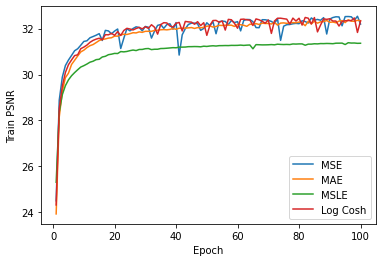

In [78]:
fig,ax = plt.subplots(1)
l,=ax.plot(range(1,101), train_psnr_COCO_mse)
l.set_label('MSE')
l,=ax.plot(range(1,101), train_psnr_COCO_mae)
l.set_label('MAE')
l,=ax.plot(range(1,101), train_psnr_COCO_msle)
l.set_label('MSLE')
l,=ax.plot(range(1,101), train_psnr_COCO_lc)
l.set_label('Log Cosh')
ax.legend()
plt.ylabel("Train PSNR")
plt.xlabel("Epoch")
plt.show()

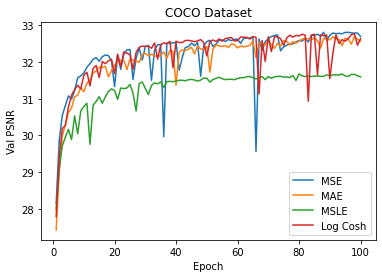

In [217]:
fig,ax = plt.subplots(1)
l,=ax.plot(range(1,101), val_psnr_COCO_mse)
l.set_label('MSE')
l,=ax.plot(range(1,101), val_psnr_COCO_mae)
l.set_label('MAE')
l,=ax.plot(range(1,101), val_psnr_COCO_msle)
l.set_label('MSLE')
l,=ax.plot(range(1,101), val_psnr_COCO_lc)
l.set_label('Log Cosh')
ax.legend()
plt.ylabel("Val PSNR")
plt.xlabel("Epoch")
plt.title(label="COCO Dataset")
plt.show()

Average MSE

In [83]:
train_losses_avg_mse = [(c+d)/2 for c,d in zip(train_losses_COCO_mse, train_losses_Div2k_mse)]
val_losses_avg_mse = [(c+d)/2 for c,d in zip(val_losses_COCO_mse, val_losses_Div2k_mse)]
train_psnr_avg_mse = [(c+d)/2 for c,d in zip(train_psnr_COCO_mse, train_psnr_Div2k_mse)]
val_psnr_avg_mse = [(c+d)/2 for c,d in zip(val_psnr_COCO_mse, val_psnr_Div2k_mse)]

Average MAE

In [84]:
train_losses_avg_mae = [(c+d)/2 for c,d in zip(train_losses_COCO_mae, train_losses_Div2k_mae)]
val_losses_avg_mae = [(c+d)/2 for c,d in zip(val_losses_COCO_mae, val_losses_Div2k_mae)]
train_psnr_avg_mae = [(c+d)/2 for c,d in zip(train_psnr_COCO_mae, train_psnr_Div2k_mae)]
val_psnr_avg_mae = [(c+d)/2 for c,d in zip(val_psnr_COCO_mae, val_psnr_Div2k_mae)]

Average MSLE

In [85]:
train_losses_avg_mlse = [(c+d)/2 for c,d in zip(train_losses_COCO_msle, train_losses_Div2k_msle)]
val_losses_avg_msle = [(c+d)/2 for c,d in zip(val_losses_COCO_msle, val_losses_Div2k_msle)]
train_psnr_avg_msle = [(c+d)/2 for c,d in zip(train_psnr_COCO_msle, train_psnr_Div2k_msle)]
val_psnr_avg_msle = [(c+d)/2 for c,d in zip(val_psnr_COCO_msle, val_psnr_Div2k_msle)]

Average LC

In [86]:
train_losses_avg_lc = [(c+d)/2 for c,d in zip(train_losses_COCO_lc, train_losses_Div2k_lc)]
val_losses_avg_lc = [(c+d)/2 for c,d in zip(val_losses_COCO_lc, val_losses_Div2k_lc)]
train_psnr_avg_lc = [(c+d)/2 for c,d in zip(train_psnr_COCO_lc, train_psnr_Div2k_lc)]
val_psnr_avg_lc = [(c+d)/2 for c,d in zip(val_psnr_COCO_lc, val_psnr_Div2k_lc)]

Average Comparison

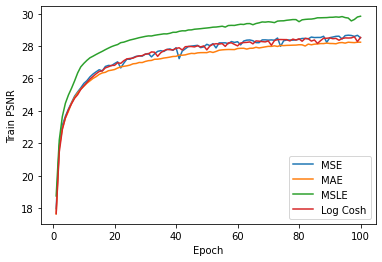

In [87]:
fig,ax = plt.subplots(1)
l,=ax.plot(range(1,101), train_psnr_avg_mse)
l.set_label('MSE')
l,=ax.plot(range(1,101), train_psnr_avg_mae)
l.set_label('MAE')
l,=ax.plot(range(1,101), train_psnr_avg_msle)
l.set_label('MSLE')
l,=ax.plot(range(1,101), train_psnr_avg_lc)
l.set_label('Log Cosh')
ax.legend()
plt.ylabel("Train PSNR")
plt.xlabel("Epoch")
plt.show()

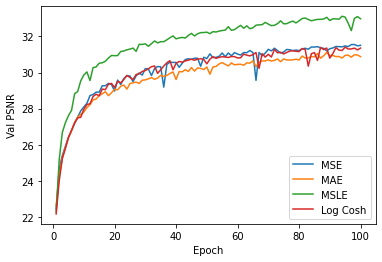

In [88]:
fig,ax = plt.subplots(1)
l,=ax.plot(range(1,101), val_psnr_avg_mse)
l.set_label('MSE')
l,=ax.plot(range(1,101), val_psnr_avg_mae)
l.set_label('MAE')
l,=ax.plot(range(1,101), val_psnr_avg_msle)
l.set_label('MSLE')
l,=ax.plot(range(1,101), val_psnr_avg_lc)
l.set_label('Log Cosh')
ax.legend()
plt.ylabel("Val PSNR")
plt.xlabel("Epoch")
plt.show()

Models Comp

In [36]:
def tensor_to_numpy(image_tensor):
  image = image_tensor.to("cpu").clone().detach()
  image = image.numpy().squeeze()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.429, 0.424, 0.425)) + np.array((0.485, 0.456, 0.406))
  image = image.clip(0, 1)
  
  return image

In [4]:
model_COCO = SRCNN(3)
model_COCO.load_state_dict(torch.load("/content/modelMSECOCO99", map_location=torch.device('cpu')))

<All keys matched successfully>

In [5]:
model_Div2k = SRCNN(3)
model_Div2k.load_state_dict(torch.load("/content/modelMSLEDiv2k98", map_location=torch.device('cpu')))

<All keys matched successfully>

In [6]:
COCO_conv1 = nn.functional.normalize(model_COCO.conv1.weight.data.reshape((64,243)))
Div2k_conv1 = nn.functional.normalize(model_Div2k.conv1.weight.data.reshape((64,243)))
COCO_conv2 = nn.functional.normalize(model_COCO.conv2.weight.data.reshape((32,64)))
Div2k_conv2 = nn.functional.normalize(model_Div2k.conv2.weight.data.reshape((32,64)))
COCO_conv3 = nn.functional.normalize(model_COCO.conv3.weight.data.reshape((3,800)))
Div2k_conv3 = nn.functional.normalize(model_Div2k.conv3.weight.data.reshape((3,800)))

In [27]:
cosine_conv1=torch.mm(COCO_conv1, Div2k_conv1.T).numpy()
cosine_conv2=torch.mm(COCO_conv2, Div2k_conv2.T).numpy()
cosine_conv3=torch.mm(COCO_conv3, Div2k_conv3.T).numpy()

In [21]:
def calculate_avg_sim(cosine_matrix, size):
  sim = 0
  for _ in range(size):
    sim += np.max(cosine_matrix)
    arg = np.argmax(cosine_matrix)
    row = int(arg / size)
    col = arg % size
    cosine_matrix[row] = np.full((size), np.NINF)
    cosine_matrix[...,col] = np.full((size), np.NINF)
  return sim / size

In [22]:
calculate_avg_sim(cosine_conv1, 64)

0.16907292560790665

In [23]:
calculate_avg_sim(cosine_conv2, 32)

0.18516334182641003

In [24]:
calculate_avg_sim(cosine_conv3, 3)

0.011808138185491165